Percentage of LHS Sliced Data: 10.00%


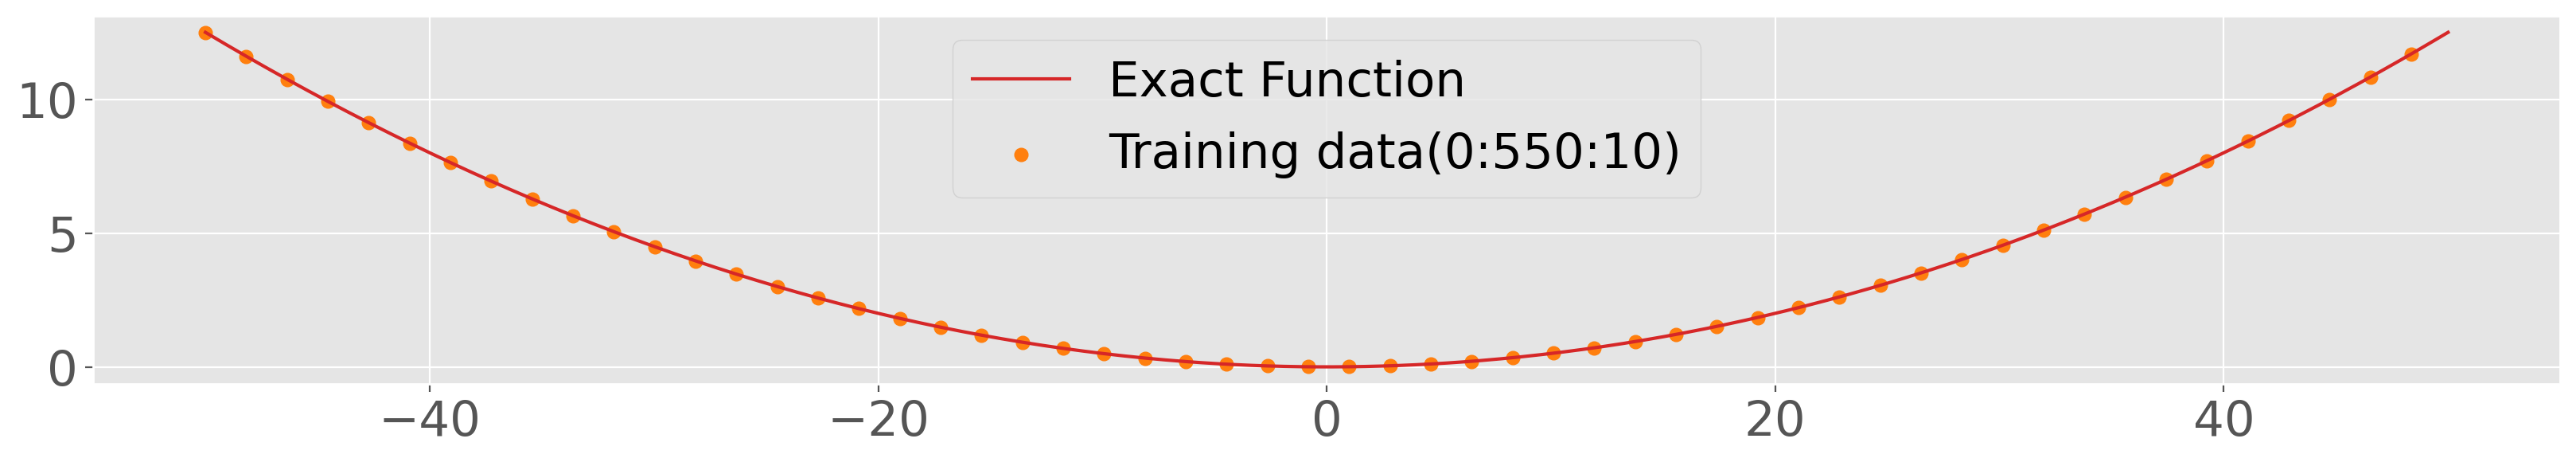

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
ModelWithoutActivation(
  (layer1): Linear(in_features=1, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=1, bias=True)
)
Epoch [1/500], Average Loss: 33.3935
Epoch [2/500], Average Loss: 33.4321
Epoch [3/500], Average Loss: 33.5358
Epoch [4/500], Average Loss: 33.5330
Epoch [5/500], Average Loss: 27.7289
Epoch [6/500], Average Loss: 29.0234
Epoch [7/500], Average Loss: 29.1079
Epoch [8/500], Average Loss: 24.2515
Epoch [9/500], Average Loss: 24.0152
Epoch [10/500], Average Loss: 24.5084
Epoch [11/500], Average Loss: 26.0530
Epoch [12/500], Average Loss: 22.6038
Epoch [13/500], Average Loss: 21.8235
Epoch [14/500], Average Loss: 23.5053
Epoch [15/500], Average Loss: 21.4332
Epoch [16/500], Average Loss: 19.2897
Epoch [17/500], Average Loss: 18.7776
Epoch [18/500], Average Loss: 20.5443
Epoch [19/500], Average Loss: 19.1157
Epoch [20/500], Average Loss: 19.1312
Epoch [21/500], Average Loss: 17.7244
Epoch [22/500]

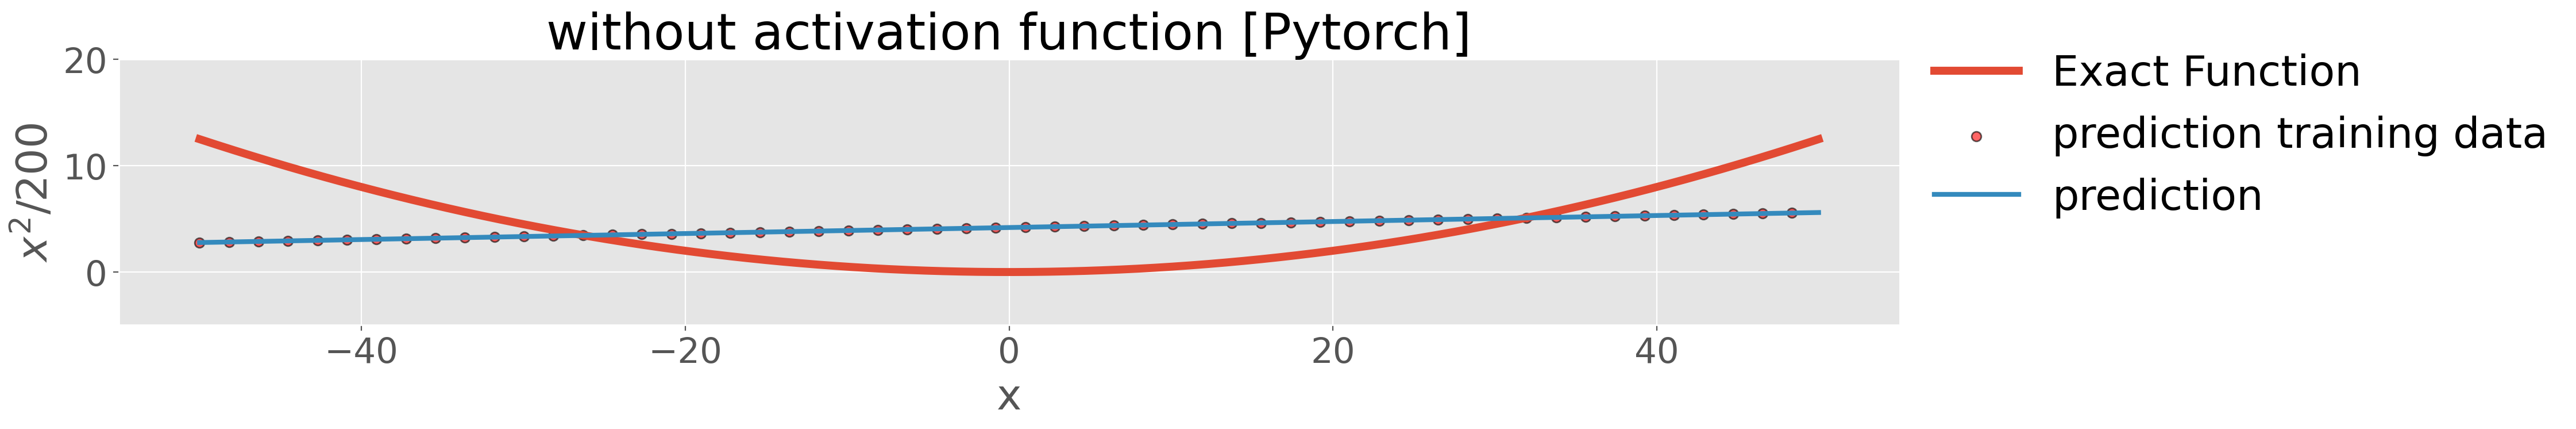

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  
# Ensure the output folder exists
output_folder = 'model_train_images'
os.makedirs(output_folder, exist_ok=True)

import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(123) # pytorch seed, to keep loss stability in the working environment 
plt.style.use('ggplot')

import matplotlib
matplotlib.rcParams['figure.dpi'] = 200  # highres display
plt.rcParams["figure.figsize"] = (20, 3)
plt.rcParams.update({'font.size': 22})




#import imageio
#my_images = []  # You can keep this list for storing images

torch.manual_seed(123)  
# Data Generation
ndata = 550
x = np.linspace(-50, 50, ndata)
y = x**2 / 200

n = len(x)  # Number of data points

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Slice out a small number of points from the LHS of the domain
x_data = x[0:550:10]
y_data = y[0:550:10]

# Convert sliced data to PyTorch tensors
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)
y_data_tensor = torch.tensor(y_data, dtype=torch.float32)

# To check the amount of data in the sliced-out portion
lhs_percentage = (x_data_tensor.shape[0] / ndata) * 100
print(f"Percentage of LHS Sliced Data: {lhs_percentage:.2f}%")

# Plotting
plt.figure()
plt.plot(x, x**2/200, color="tab:red", label="Exact Function")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data(0:550:10)")
plt.legend()
plt.show()
print(type(x_data)) # to check data type 
print(type(x_data_tensor)) # to check data type 


torch.manual_seed(123) 
class PerformancePlotCallback:
    def __init__(self, x_test, y_test, x, count, model_name):
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x
        # Create the directory if it doesn't exist
        self.save_dir = 'model_train_images'
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, model, optimizer, criterion):
        if epoch % 10 == 0:
            self.count += 1

            model.eval()
            with torch.no_grad():
                y_pred = model(self.x_test)

            plt.figure(figsize=(8, 4))
            plt.scatter(self.x_test.numpy(), y_pred.numpy(), alpha=0.6, color='#FF0000', lw=1, ec='black')
            plt.scatter(self.x_test.numpy(), self.y_test.numpy(), alpha=0.1, color='blue', lw=1, ec='black')
            plt.plot(self.x.numpy(), (self.x.numpy()**2)/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim([-50, 50])
            plt.ylim([-5, 20])
            plt.xlabel('x')
            plt.ylabel('$x^2/200$')
            plt.tight_layout()
            #plt.title(f'Prediction Visualization - Epoch: {epoch}', fontsize=18)

            #save_path = os.path.join(self.save_dir, f'{self.model_name}_{self.count}.png')
            #plt.savefig(save_path)
            #plt.close()     

# MODEL 1
torch.manual_seed(123) 
import torch
import torch.nn as nn
import torch.optim as optim
import imageio
import matplotlib.pyplot as plt
import numpy as np


# Model definition
class ModelWithoutActivation(nn.Module):
    def __init__(self):
        super(ModelWithoutActivation, self).__init__()
        self.layer1 = nn.Linear(1, 32)
        self.layer2 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

model1 = ModelWithoutActivation()  
# complie the model 
criterion = nn.MSELoss() # loss function 
optimizer = optim.Adam(model1.parameters(), lr=1e-2)
print(model1) #Print model summary

# Define batch size
batch_size = 32

# Wrap data in DataLoader for batching
train_data = torch.utils.data.TensorDataset(x_data_tensor.unsqueeze(1), y_data_tensor.unsqueeze(1))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(500):
    model1.train()
    total_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    # Print epoch number and average loss for every epoch
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/500], Average Loss: {average_loss:.4f}')

# Plotting
plt.figure()
plt.plot(x, x**2/200, lw=5, label="Exact Function")

plt.scatter(x_data_tensor, model1(x_data_tensor.unsqueeze(1)).detach().numpy(), alpha=0.6, color='#FF0000', lw=1, ec='black', label="prediction training data")

plt.plot(x_tensor, model1(x_tensor.unsqueeze(1)).detach().numpy(), lw=3, label="prediction")
plt.ylim([-5, 20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')
l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
plt.title("without activation function [Pytorch]")
plt.savefig('y_x2_model.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution
plt.show()


In [2]:
# Check PyTorch's default float type
float_type = torch.get_default_dtype()
print("PyTorch default float type:", float_type)

PyTorch default float type: torch.float32


Epoch [1/500], Loss: 135.1521
Epoch [2/500], Loss: 14.4211
Epoch [3/500], Loss: 21.5618
Epoch [4/500], Loss: 11.1107
Epoch [5/500], Loss: 3.8486
Epoch [6/500], Loss: 6.8370
Epoch [7/500], Loss: 3.3285
Epoch [8/500], Loss: 3.8311
Epoch [9/500], Loss: 4.6335
Epoch [10/500], Loss: 3.2091
Epoch [11/500], Loss: 2.8250
Epoch [12/500], Loss: 2.7626
Epoch [13/500], Loss: 2.3562
Epoch [14/500], Loss: 2.5330
Epoch [15/500], Loss: 2.5124
Epoch [16/500], Loss: 2.2613
Epoch [17/500], Loss: 2.0184
Epoch [18/500], Loss: 1.9563
Epoch [19/500], Loss: 2.0000
Epoch [20/500], Loss: 1.9256
Epoch [21/500], Loss: 1.7365
Epoch [22/500], Loss: 1.8239
Epoch [23/500], Loss: 1.8497
Epoch [24/500], Loss: 1.7961
Epoch [25/500], Loss: 1.7255
Epoch [26/500], Loss: 1.8039
Epoch [27/500], Loss: 1.7572
Epoch [28/500], Loss: 1.7102
Epoch [29/500], Loss: 1.7844
Epoch [30/500], Loss: 1.6273
Epoch [31/500], Loss: 1.7156
Epoch [32/500], Loss: 1.6309
Epoch [33/500], Loss: 1.7289
Epoch [34/500], Loss: 1.7275
Epoch [35/500], Lo

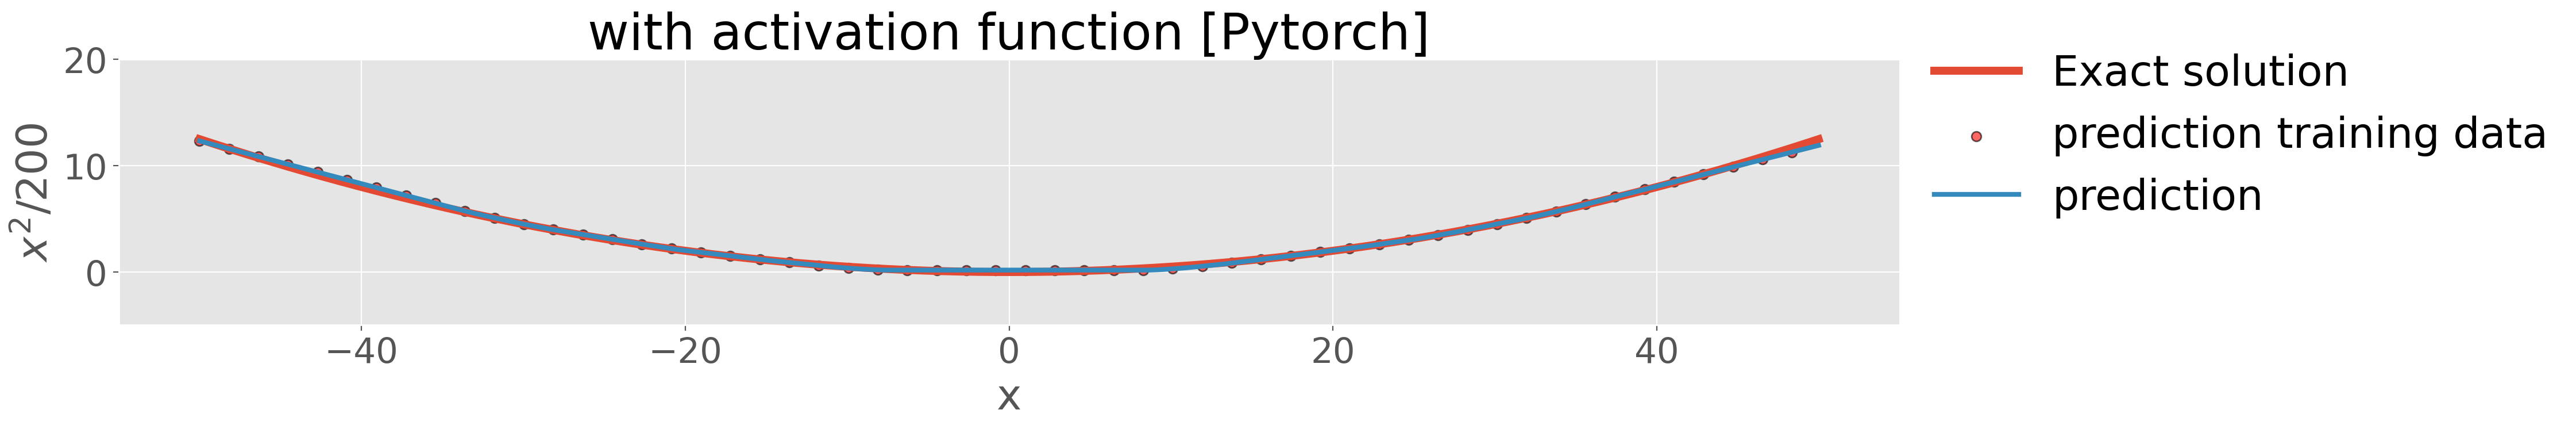

Execution time: 4.4336841106414795 seconds


In [3]:
 torch.manual_seed(123)
    
import time
start_time = time.time()   # to checck timing    
    
    # MODEL 2 
# Model definition
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.layer1 = nn.Linear(1, 132)
        self.layer2 = nn.Linear(132, 132)
        self.layer3 = nn.Linear(132, 132)
        self.layer4 = nn.Linear(132, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

model2 = Model2() 
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-2)



# Define batch size
batch_size = 32

# Wrap data in DataLoader for batching
train_data = torch.utils.data.TensorDataset(x_data_tensor.unsqueeze(1), y_data_tensor.unsqueeze(1))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(500):
    model1.train()
    total_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    # Print epoch number and average loss for every epoch
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/500], Loss: {average_loss:.4f}')

import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, x**2/200, lw=5, label="Exact solution")
plt.scatter(x_data_tensor, model2(x_data_tensor.unsqueeze(1)).detach().numpy(), alpha=0.6,
            color='#FF0000', lw=1, ec='black', label="prediction training data")

plt.plot(x_tensor, model2(x_tensor.unsqueeze(1)).detach().numpy(), lw=3, label="prediction")
plt.ylim([-5, 20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
plt.title("with activation function [Pytorch]") 
plt.savefig('y_x2_model1.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution
plt.show()

# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")  

Epoch [1/500], Loss: 66.1301
Epoch [2/500], Loss: 95.7265
Epoch [3/500], Loss: 7.4294
Epoch [4/500], Loss: 29.5023
Epoch [5/500], Loss: 26.3687
Epoch [6/500], Loss: 14.1302
Epoch [7/500], Loss: 2.8613
Epoch [8/500], Loss: 6.9152
Epoch [9/500], Loss: 9.1981
Epoch [10/500], Loss: 3.5233
Epoch [11/500], Loss: 2.1172
Epoch [12/500], Loss: 4.4465
Epoch [13/500], Loss: 5.6320
Epoch [14/500], Loss: 4.3629
Epoch [15/500], Loss: 2.3907
Epoch [16/500], Loss: 2.1167
Epoch [17/500], Loss: 3.6005
Epoch [18/500], Loss: 4.0433
Epoch [19/500], Loss: 2.7568
Epoch [20/500], Loss: 1.9444
Epoch [21/500], Loss: 2.3647
Epoch [22/500], Loss: 3.0188
Epoch [23/500], Loss: 3.0222
Epoch [24/500], Loss: 2.4476
Epoch [25/500], Loss: 1.9647
Epoch [26/500], Loss: 2.0967
Epoch [27/500], Loss: 2.5404
Epoch [28/500], Loss: 2.5732
Epoch [29/500], Loss: 2.1698
Epoch [30/500], Loss: 1.9257
Epoch [31/500], Loss: 2.0781
Epoch [32/500], Loss: 2.3120
Epoch [33/500], Loss: 2.2987
Epoch [34/500], Loss: 2.0691
Epoch [35/500], Lo

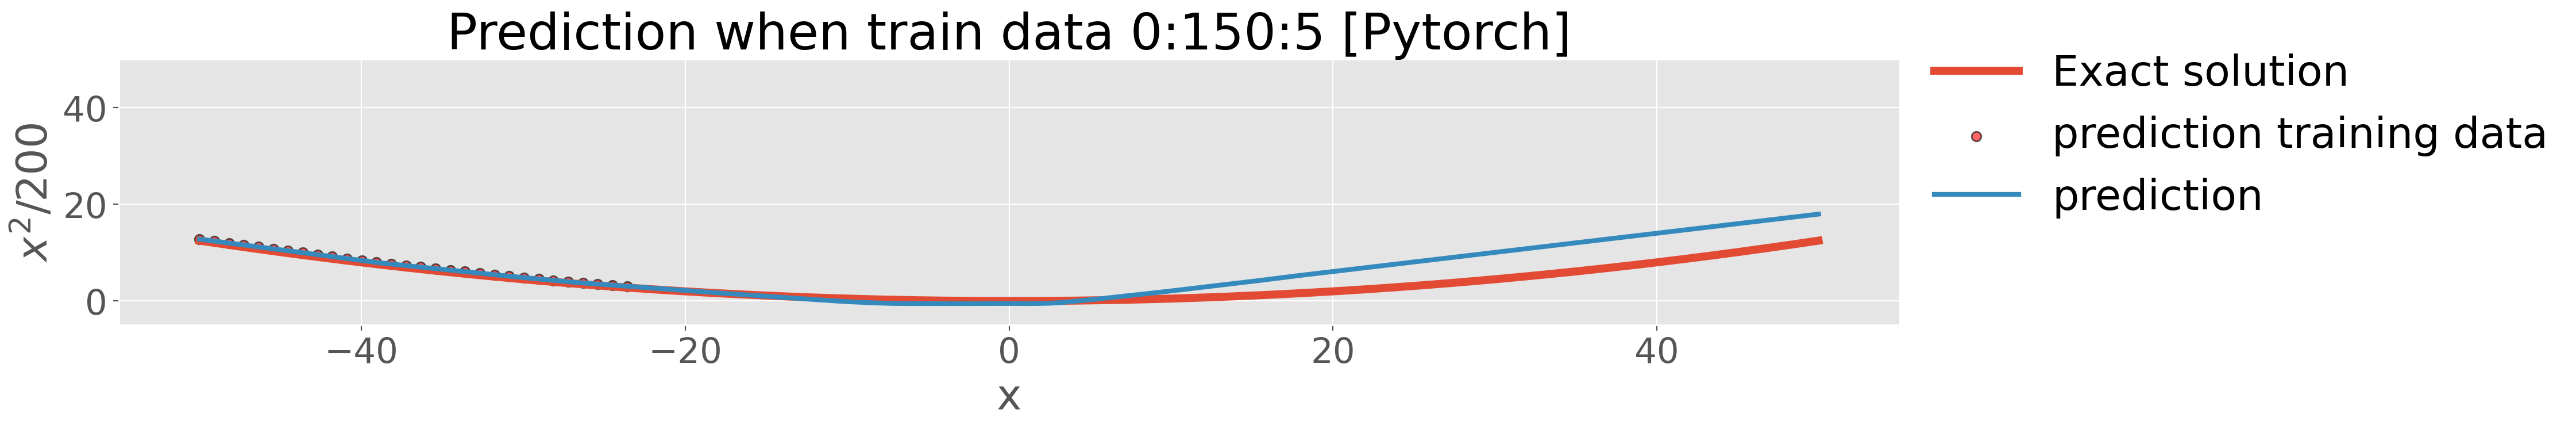

Execution time: 2.8941686153411865 seconds


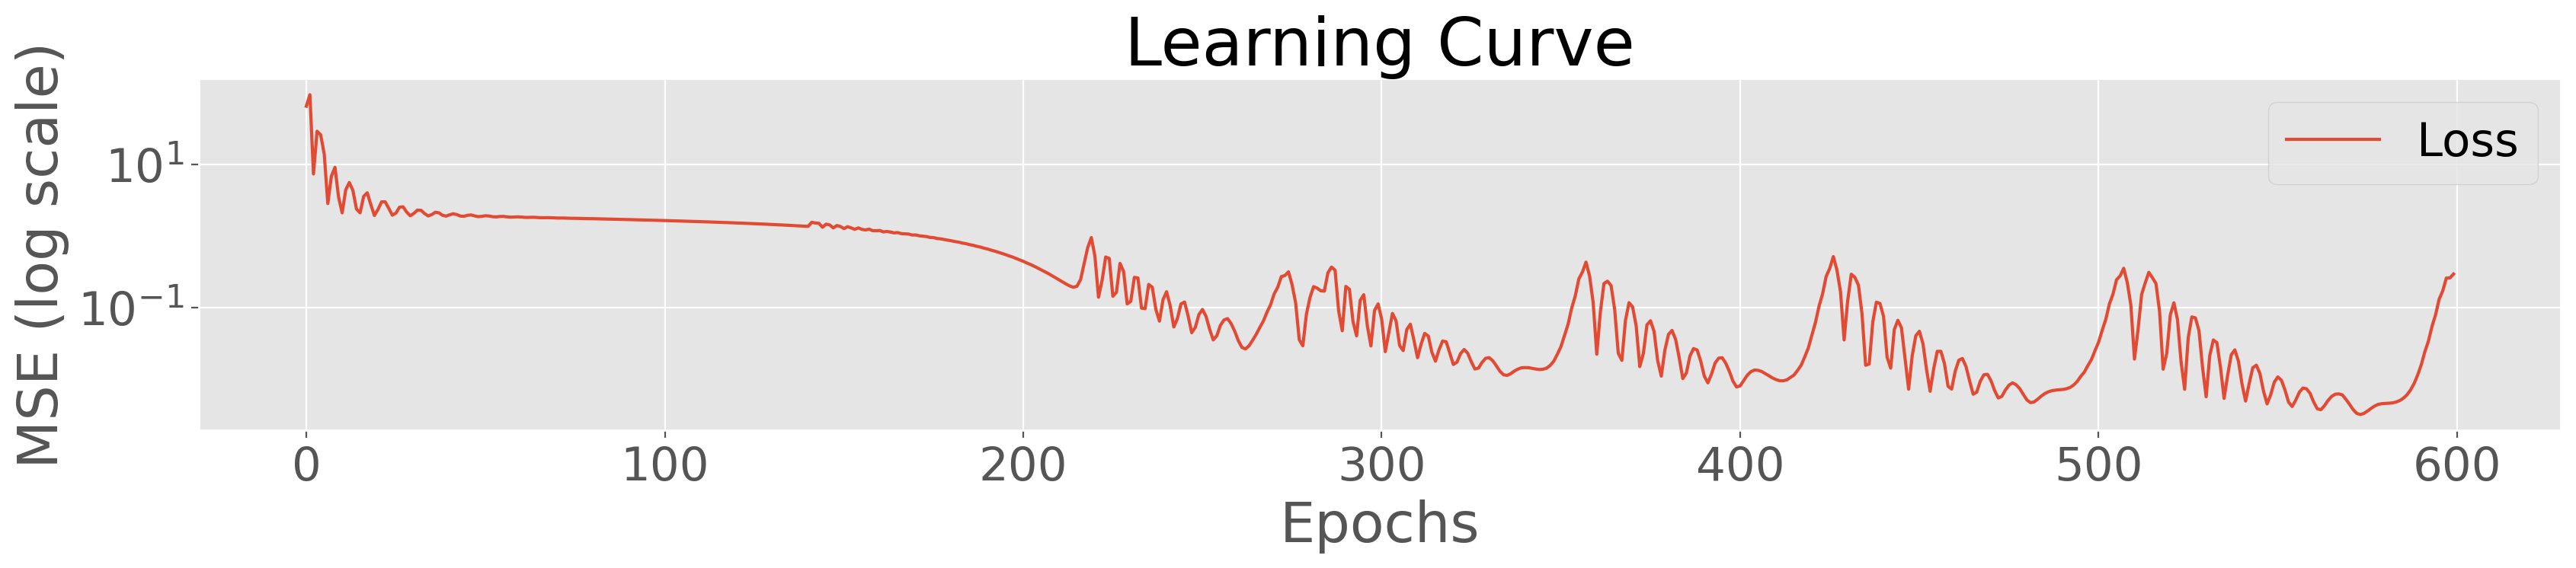

In [4]:
 torch.manual_seed(123) 
    # Model 2d

import time
start_time = time.time() 

#import imageio
import numpy as np
import matplotlib.pyplot as plt

# Define the sliced data
x_data = x[0:150:5]
y_data = y[0:150:5] 
# Convert sliced data to PyTorch tensors
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)
y_data_tensor = torch.tensor(y_data, dtype=torch.float32)


# Model definition
class Model2d(nn.Module):
    def __init__(self):
        super(Model2d, self).__init__()
        self.layer1 = nn.Linear(1, 132)
        self.layer2 = nn.Linear(132, 132)
        self.layer3 = nn.Linear(132, 132)
        self.layer4 = nn.Linear(132, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

model2d = Model2d()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2d.parameters(), lr=1e-2)

# Define batch size
batch_size = 32

# Wrap data in DataLoader for batching
train_data = torch.utils.data.TensorDataset(x_data_tensor.unsqueeze(1), y_data_tensor.unsqueeze(1))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# to store loss values
mse_values = [] 
# Training loop
for epoch in range(600):
    model1.train()
    total_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model2d(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        

    # Print epoch number and average loss for every epoch
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/500], Loss: {average_loss:.4f}')
    
    # for learning curve mse and store loss
    mse_values.append(average_loss) 

plt.plot(x, x**2/200, lw=5, label="Exact solution")
plt.scatter(x_data_tensor, model2d(x_data_tensor.unsqueeze(1)).detach().numpy(), alpha=0.6, 
                color='#FF0000', lw=1, ec='black', label="prediction training data")

plt.plot(x_tensor, model2d(x_tensor.unsqueeze(1)).detach().numpy(), lw=3, label="prediction")
plt.ylim([-5, 50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

plt.title("Prediction when train data 0:150:5 [Pytorch]")  
plt.savefig('y_x2_model2_150.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution 

#plt.title("LHS Sliced (0:150:5) [model2d]")
plt.show()





# Store losses in a file
with open('loss_per_epoch_150_P.txt', 'w') as f:
    for epoch, loss in enumerate(mse_values):
        f.write(f"Epoch {epoch+1}: {loss}\n") 






# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds") 



# Plot the learning curve (MSE vs. Epochs) in log scale
plt.figure()
plt.semilogy(range(600), mse_values, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE (log scale)')
plt.title('Learning Curve')
plt.legend()
plt.savefig('y_x2_losscurvemodel2_150.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution 
plt.show()


Epoch [1/600], Loss: 51.7097
Epoch [2/600], Loss: 11.5700
Epoch [3/600], Loss: 1.7550
Epoch [4/600], Loss: 2.3787
Epoch [5/600], Loss: 1.7815
Epoch [6/600], Loss: 1.5243
Epoch [7/600], Loss: 2.2976
Epoch [8/600], Loss: 1.8943
Epoch [9/600], Loss: 1.9553
Epoch [10/600], Loss: 1.8124
Epoch [11/600], Loss: 1.3336
Epoch [12/600], Loss: 1.4333
Epoch [13/600], Loss: 1.4650
Epoch [14/600], Loss: 1.5901
Epoch [15/600], Loss: 1.0873
Epoch [16/600], Loss: 1.4103
Epoch [17/600], Loss: 1.7793
Epoch [18/600], Loss: 1.0864
Epoch [19/600], Loss: 1.6242
Epoch [20/600], Loss: 1.2295
Epoch [21/600], Loss: 1.2667
Epoch [22/600], Loss: 1.6084
Epoch [23/600], Loss: 1.5168
Epoch [24/600], Loss: 0.9954
Epoch [25/600], Loss: 1.4417
Epoch [26/600], Loss: 1.3878
Epoch [27/600], Loss: 1.2381
Epoch [28/600], Loss: 1.1355
Epoch [29/600], Loss: 1.2589
Epoch [30/600], Loss: 1.2230
Epoch [31/600], Loss: 2.4647
Epoch [32/600], Loss: 1.6845
Epoch [33/600], Loss: 0.9879
Epoch [34/600], Loss: 1.9805
Epoch [35/600], Loss:

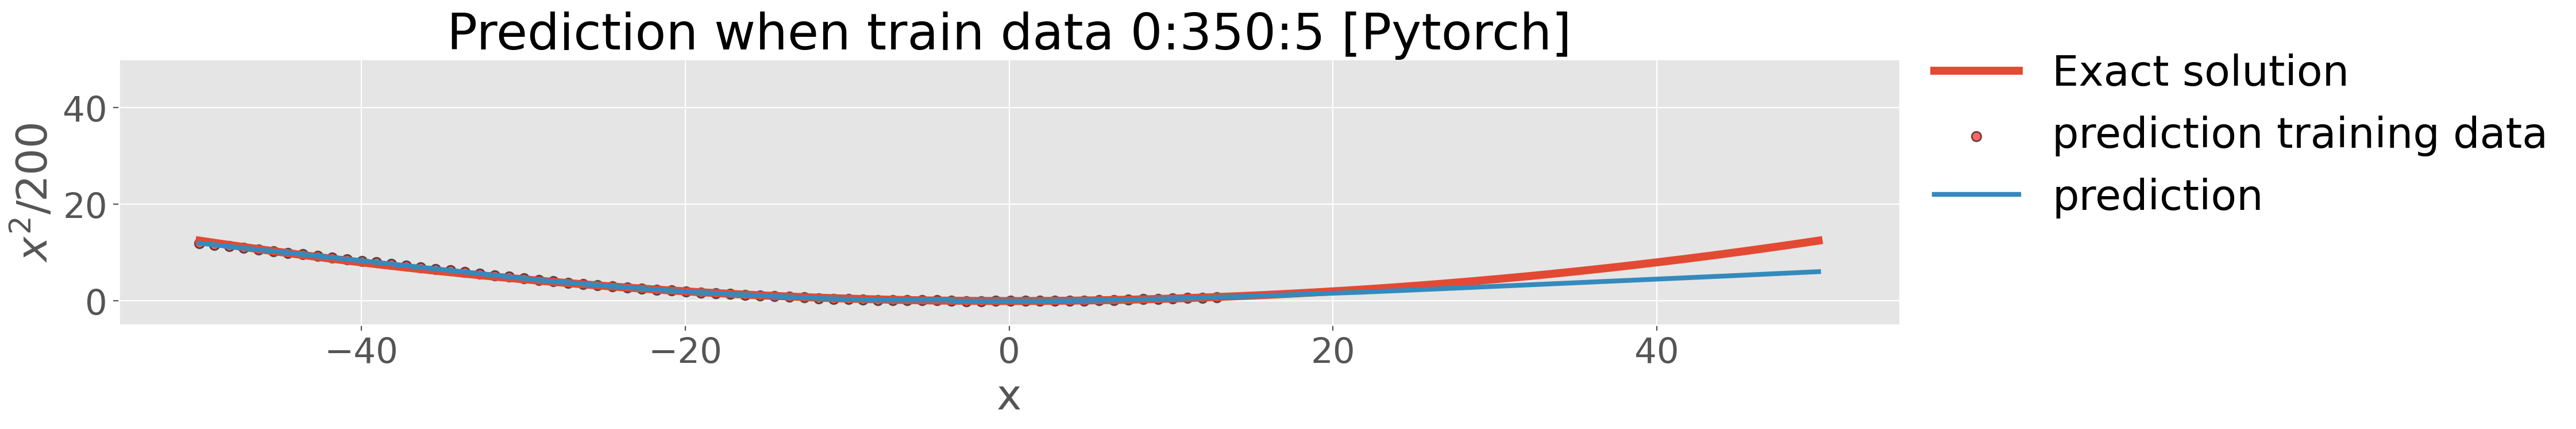

Execution time: 8.911087989807129 seconds


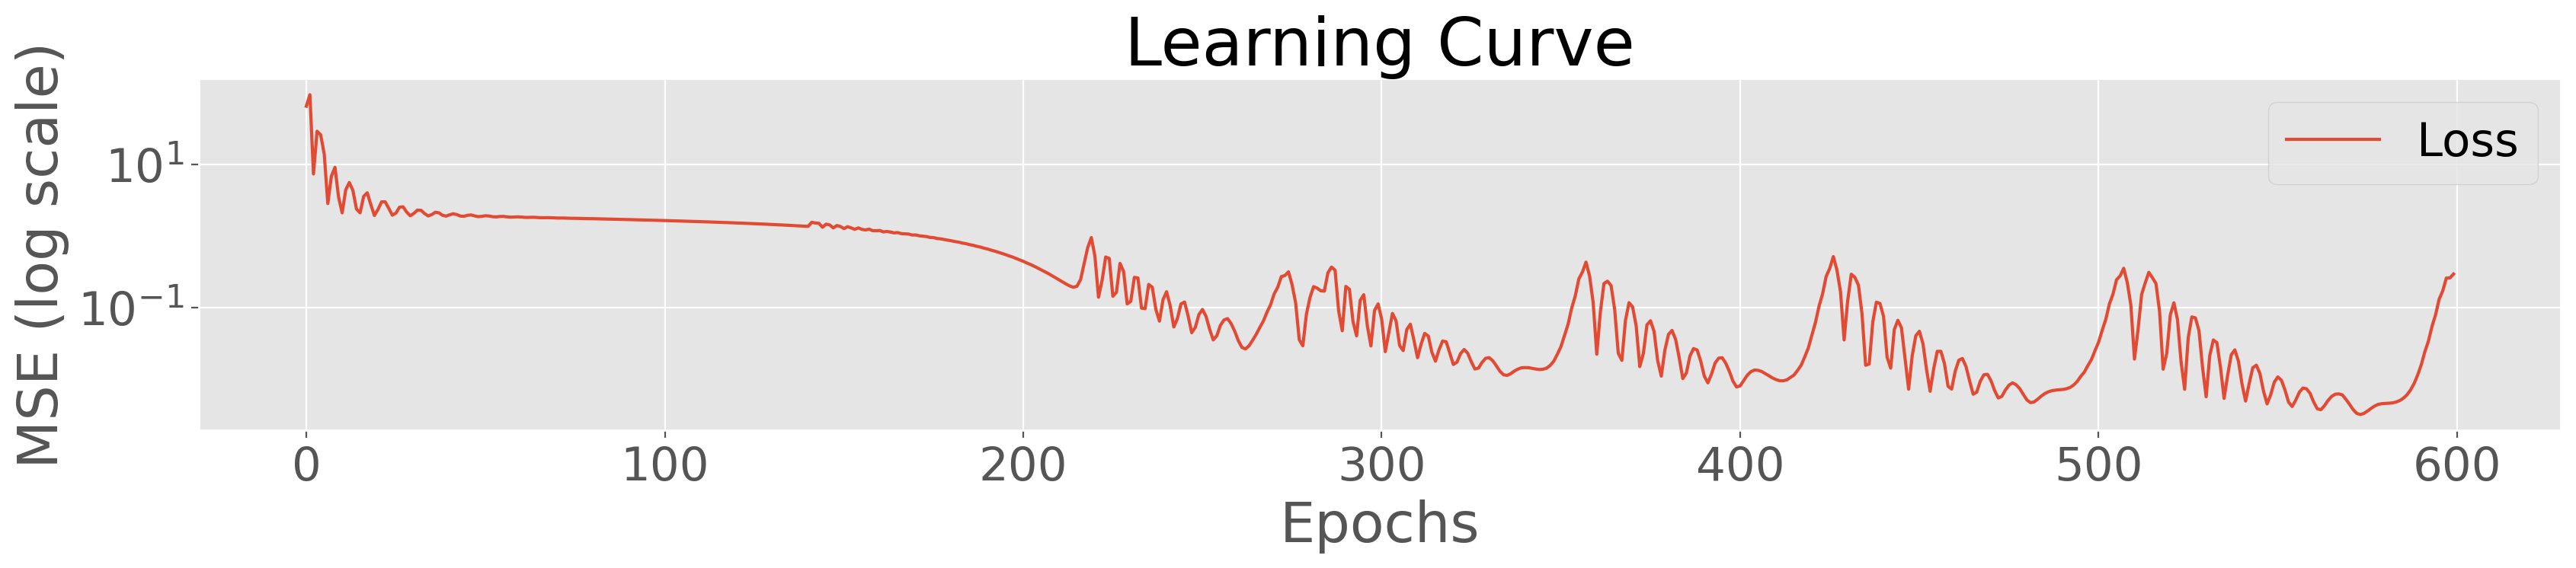

In [5]:
torch.manual_seed(123) 
 # Model 2d
    
import time
start_time = time.time()  

#import imageio
import numpy as np
import matplotlib.pyplot as plt

# Define the sliced data
x_data = x[0:350:5]
y_data = y[0:350:5] 
# Convert sliced data to PyTorch tensors
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)
y_data_tensor = torch.tensor(y_data, dtype=torch.float32)


# Model definition
class Model2d(nn.Module):
    def __init__(self):
        super(Model2d, self).__init__()
        self.layer1 = nn.Linear(1, 132)
        self.layer2 = nn.Linear(132, 132)
        self.layer3 = nn.Linear(132, 132)
        self.layer4 = nn.Linear(132, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

model2d = Model2d()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2d.parameters(), lr=1e-2)

# Define batch size
batch_size = 32

# Wrap data in DataLoader for batching
train_data = torch.utils.data.TensorDataset(x_data_tensor.unsqueeze(1), y_data_tensor.unsqueeze(1))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

losses_pytorch = []
# Training loop
for epoch in range(600):
    model1.train()
    total_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model2d(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    # Print epoch number and average loss for every epoch
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/600], Loss: {average_loss:.4f}')
     # for learning curve mse
    #mse_values.append(average_loss) 
    
    losses_pytorch.append(loss.item()) 
    
plt.plot(x, x**2/200, lw=5, label="Exact solution")
plt.scatter(x_data_tensor, model2d(x_data_tensor.unsqueeze(1)).detach().numpy(), alpha=0.6, 
                color='#FF0000', lw=1, ec='black', label="prediction training data")

plt.plot(x_tensor, model2d(x_tensor.unsqueeze(1)).detach().numpy(), lw=3, label="prediction")
plt.ylim([-5, 50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
plt.title("Prediction when train data 0:350:5 [Pytorch]")  

plt.savefig('y_x2_model2_350.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution 
#plt.title("LHS Sliced (0:350:5) [model2d]")
plt.show()


# Store losses in a file
with open('loss_per_epoch_350_P.txt', 'w') as f:
    for epoch, loss in enumerate(losses_pytorch):
        f.write(f"Epoch {epoch+1}: {loss}\n")
        
        


# Timing
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")   


# Plot the learning curve (MSE vs. Epochs) in log scale
plt.figure()
plt.semilogy(range(600), mse_values, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE (log scale)')
plt.title('Learning Curve')
plt.legend()

plt.savefig('y_x2_losscurvemodel2_350.png', dpi=300)  # 'example_plot.png' is the file name; dpi sets the resolution 
plt.show()